In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Proyecto integrado

## Nivel de éxito de videojuegos en distintas plataformas en el año 2016

### 1. Preparación de los datos 


Primero leemos y analizamos los tipos de datos que tenemos, los nombres de las columnas y valores que contienen.

In [2]:
#Leemos el archivo
games = pd.read_csv("games.csv") 

In [3]:
#Evaluamos los datos
games.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Nos encontramos con 3 columnas cuyos valores ausentes son significativos, ya que son una gran proporsión de los valores totales. Se requiere analizar a qué están ligados antes de saber cómo tratarlos, dado que son datos categóricos su tratamiento se realizará más adelante para continuar con el análisis de ventas.

In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Hacemos las modificaciones necesarias a los datos. Agregamos una columna con formato fecha para el año de lanzamiento sin eliminar la columan existente ya que podremos utilizar el tipo de datos flotantes más adelante. Modificaremos los nombres de las columnas a minúsculas para cumplir con la estructura. Crearemos una columna con el user score como flotante sin eliminar la anterior como respaldo, para lo que será necesario respetar los datos que están por procesar (tbd).

In [6]:
#creamos una columna con el formato fecha para el año de lanzamiento.
games["Year_Date"] = pd.to_datetime(games["Year_of_Release"], format="%Y") 

In [7]:
#cambiamos los nombres a minúsculas
games.columns = games.columns.str.lower() 

En el caso de datos tbd haremos un filtrado, los que cumplen la condición de ser tbd se asignaran el valor de la media para no eliminarlos ni tomarlos como nulos. Crearemos una nueva columna con estos datos modificados.

<Axes: >

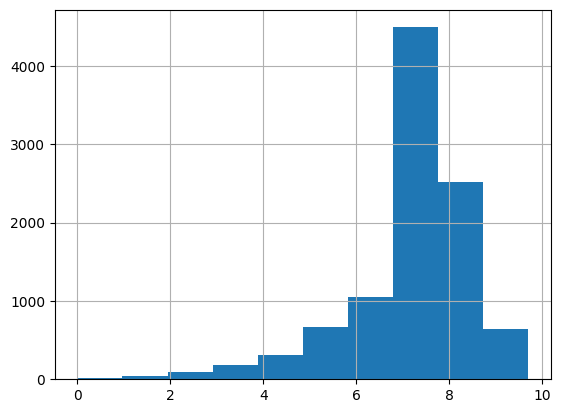

In [8]:
#Nueva columna de user score como flotante y asignamos ña mediana a tbd para poder procesar estos datos ya que están sin determinarse
#Donde se encuentre tbd se reemplazará por la mediana
games["user_score_new"] = np.where(
    games["user_score"] == 'tbd',
    games[games["user_score"] != 'tbd']["user_score"].astype("float").median(),
    games["user_score"]
)
games["user_score_new"] = games["user_score_new"].astype("float")

#Visualizamos las calificaciones de los usuarios en nuestra nueva columna
games["user_score_new"].hist()

Nos encontramos con un valor muy significativo de valores ausentes, debido a que tenemos una gran cantidad de datos y que hay mucha variación entre si, reemplazaremos los ausentes por la mediana para evitar hacer un sesgo y modificar los resultados estadísticos en los posteriores análisis.

In [9]:
#calculamos la mediana
games[games["user_score"] != 'tbd']["user_score"].astype("float").median()

7.5

In [10]:
mediana = games[games["user_score"] != 'tbd']["user_score"].astype("float").median()
#rellenamos valores nulos
games["user_score_new"] = games["user_score_new"].fillna(mediana)

#### Ventas totales

In [11]:
#Suma de las ventas totales
games["total_sales"] = games["na_sales"] + games["eu_sales"] + games["jp_sales"] + games["other_sales"]

### 2. Análisis de datos

#### ¿Los datos son significativos en cada periodo? 

Graficaremos los lanzamientos agrupándolos por año para distinguir los periodos más relevantes

<Axes: xlabel='year_date'>

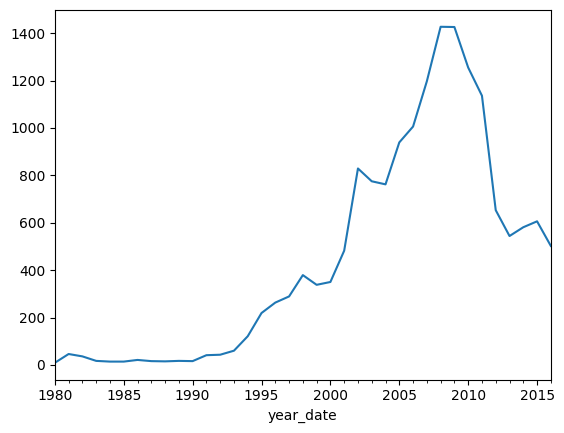

In [12]:
#Agrupamos y graficamos
games.groupby("year_date")["name"].count().plot(kind="line") 

<Axes: xlabel='year_date'>

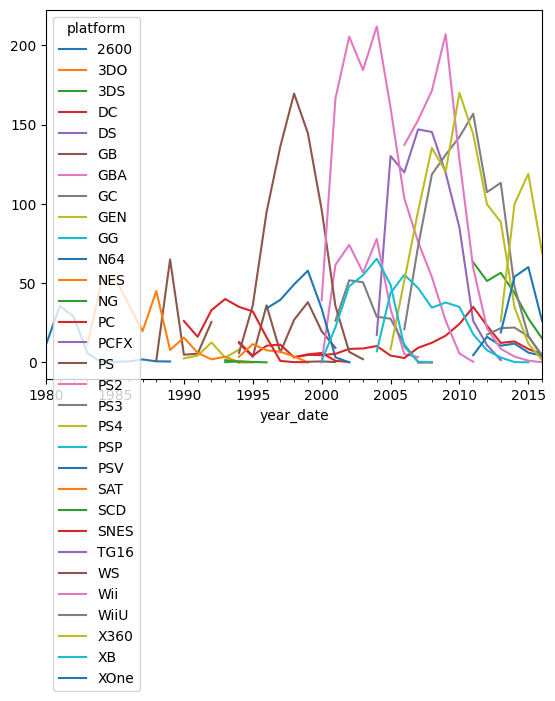

In [13]:
#Graficaremos por año y por ventas totales para cada plataforma
games.pivot_table(index="year_date", columns="platform", values="total_sales", aggfunc="sum").plot(kind="line")

Dado que antes del 1993 los lanzamientos no son muchos y no parecen afectar la tendencia posterios ni las decisiones que puedan tomarse para el 2017, podemos filtrarlos de nuestro análisis. Hay una tendencia positiva hasta 2008, y posteriormente hay un declive en lacantidad de lanzamientos.Se observa que la popularidad de las plataformas no es constante y en algunos casos las ventas llegan a desaparecer, por lo que anlizaremos cuales plataformas se han mantenido rentables a lo largo de los años.

In [14]:
#Conteo de años en los que se ha vendido en las plataformas
games.groupby("platform")["year_date"].nunique().sort_values(ascending=False)

platform
PC      26
GB      13
NES     12
X360    12
PSP     12
PS2     12
Wii     11
DS      11
PS3     11
2600    10
SNES    10
PS      10
XB       9
GBA      8
DC       7
GC       7
N64      7
SAT      6
3DS      6
PSV      6
WiiU     5
GEN      5
NG       4
PS4      4
XOne     4
WS       3
SCD      2
3DO      2
TG16     1
GG       1
PCFX     1
Name: year_date, dtype: int64

Es considerable anotar que las plataformas que han tenido ventas por mas de 10 años deben ser tomadas en cuenta como rentables si entre estos años se incluye el 2016, ya que aunque no sean las de mayores ventas puede representar estabbilidad en el mercado.

#### Plataformas más populares. ¿Cuales eran las plataformas más populares y ahora no? ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

<Axes: xlabel='year_date'>

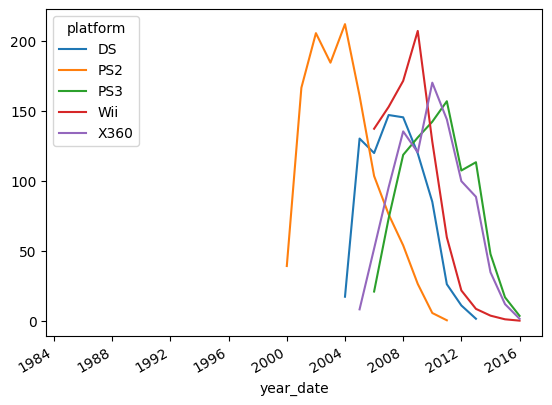

In [15]:
#plataformas por ventas totales
top_platforms = list(games.groupby("platform")["total_sales"].sum().sort_values().tail(5).index)
#graficaremos el top 5 de las plataformas con mayor ventas

(
    games[games["platform"].isin(top_platforms)]
    .pivot_table(index="year_date",
                 columns="platform",
                 values="total_sales",
                 aggfunc="sum")
    .plot(kind="line")
)

Graficamos la distribución por año de las plataformas más populares desde 1993

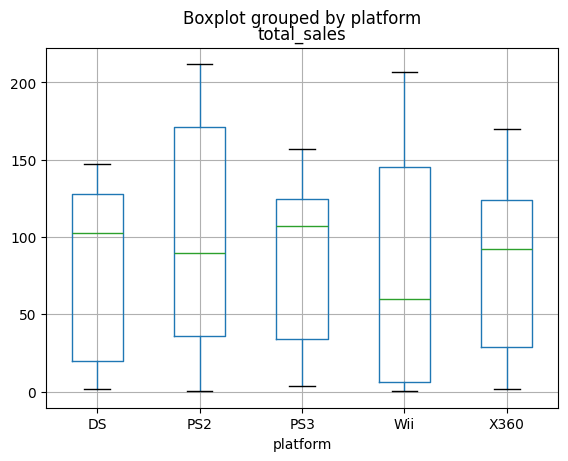

In [16]:
#Aplicamos un filtro para considerar los juegos a partir de 1993
games_act = games.query("year_date > '1993-01-01'")

#Agrupamos por fecha y plataforma en ventas totales
sales_by_year = games_act.groupby(["year_date", "platform"])["total_sales"].sum().reset_index()

#Creamos diagramas de caja
sales_by_year[sales_by_year["platform"].isin(top_platforms)][["total_sales", "platform"]].boxplot(
    column="total_sales",
    by="platform",
)
plt.show()

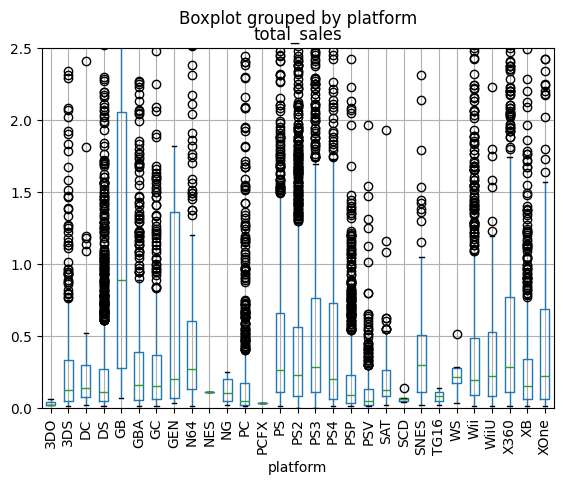

In [17]:
#Distribución de ventas totales por plataforma
games_act.boxplot(
    column="total_sales",
    by="platform",
    rot= 90
)
plt.ylim(0, 2.5)
plt.show()

<Axes: xlabel='platform'>

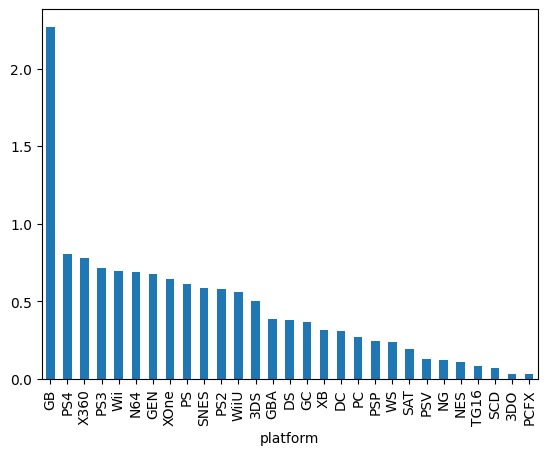

In [18]:
#creamos un gráfico de barras de las ventas totales respecto a las plataformas
(
    games_act.groupby("platform")["total_sales"]
    .mean()
    .sort_values(ascending=False)
    .plot(kind="bar")
)

Al comparar el diagrama de promedios con los diagramas de cajas, observamos que el promedio de ventas de GB es mucho mayor que el resto, así como tambien vemos que es la plataforma con menos valores atipicos. Por otro lado, también observamos que puede que los promedios no nos digan información muy precisa estadisticamente ya que los cuadriles son muy dispersos, parece no haber un comportamiento muy uniforme en las ventas.

Para descubrir el comportamiento de la popularidad en cuanto al tiempo, sería interesante dividir el análisis por consola. Ya que cada consola suele lanzar su actualización impactando las ventas de su versión anterior. Clasificaremos las plataformas de la siguiente manera:
- XBox: XB, X360, XOne
- Play Station: PS, PS2, PS3, PS4, 
- Play portátil: PSP, PSV
- Nintendo: NES, SNES, N64, GC, Wii, WiiU
- Nintendo portátil: GB, GC, GBA, DS, 3DS

<Axes: xlabel='year_date'>

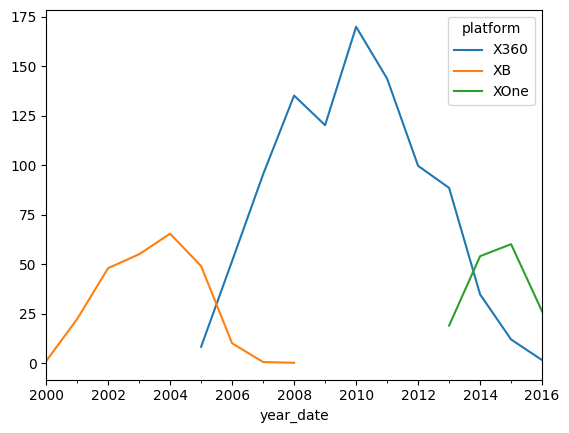

In [19]:
xbox = ["XB", "X360", "XOne"]

games_act[games_act["platform"].isin(xbox)].pivot_table(index="year_date",
                                                              columns="platform",
                                                              values="total_sales",
                                                              aggfunc="sum").plot(kind="line")


<Axes: xlabel='year_date'>

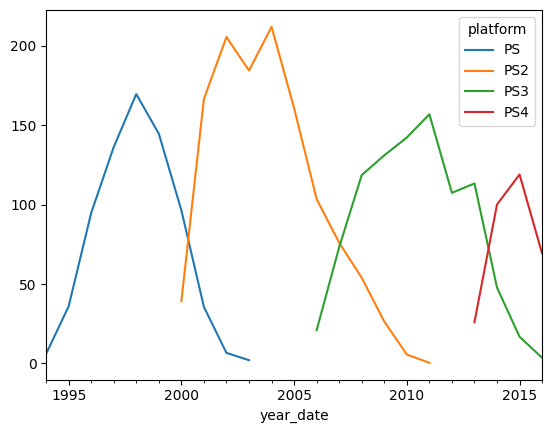

In [20]:
play_s = ["PS", "PS2", "PS3", "PS4"]

games_act[games_act["platform"].isin(play_s)].pivot_table(index="year_date",
                                                              columns="platform",
                                                              values="total_sales",
                                                              aggfunc="sum").plot(kind="line")

<Axes: xlabel='year_date'>

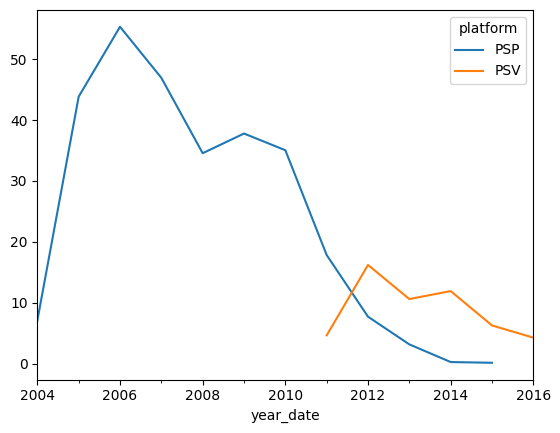

In [21]:
play_p = ["PSP", "PSV"]

games_act[games_act["platform"].isin(play_p)].pivot_table(index="year_date",
                                                              columns="platform",
                                                              values="total_sales",
                                                              aggfunc="sum").plot(kind="line")

<Axes: xlabel='year_date'>

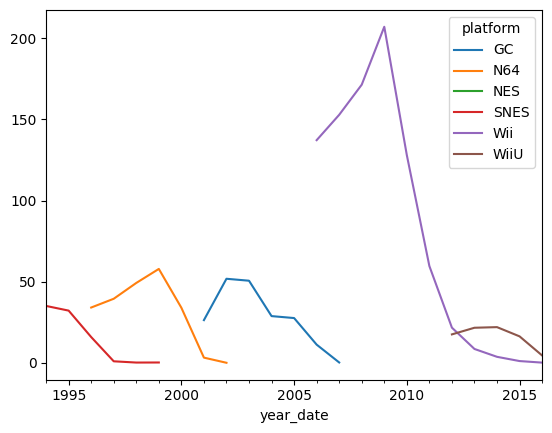

In [22]:
nintendo = ["NES", "SNES", "N64", "GC", "Wii", "WiiU"]

games_act[games_act["platform"].isin(nintendo)].pivot_table(index="year_date",
                                                              columns="platform",
                                                              values="total_sales",
                                                              aggfunc="sum").plot(kind="line")

<Axes: xlabel='year_date'>

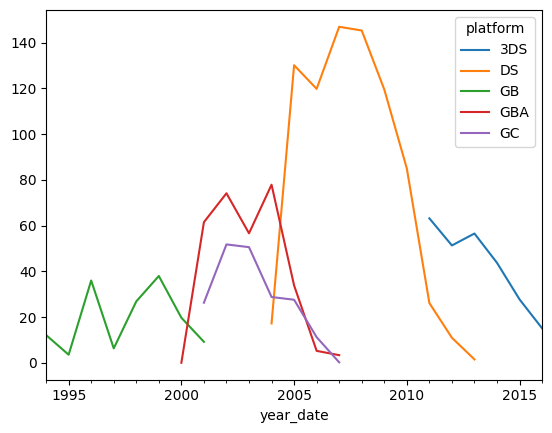

In [23]:
nintendo_p = ["GB", "GC", "GBA", "DS", "3DS"]
              
games_act[games_act["platform"].isin(nintendo_p)].pivot_table(index="year_date",
                                                              columns="platform",
                                                              values="total_sales",
                                                              aggfunc="sum").plot(kind="line")

Se observa claramente que en el caso de cada consola la popularidad llega a su punto máximo al año o par de años siguientes al lanzamiento y posteriormente decae al toparse con el lanzamiento de una nueva plataforma o versión, podemos deducir que las plataformas generan ventas en un periodo de aproximadamente 10 años.

#### Periodo de interés. 

Dado que nos interesa el análisis para predicciones del año 2017, lo más representativo sería analizar unicamente las plataformas que han tenido ventas en los ultimos 5 años, adicionalmente analizaremos aquellas plataformas que han tenido ventas en el 2016.

In [24]:
#Filtramos los la tabla con datos del 2016
games_5 = games[games["year_of_release"] >= 2011]
print(games_5.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Index: 4022 entries, 16 to 16714
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             4022 non-null   object        
 1   platform         4022 non-null   object        
 2   year_of_release  4022 non-null   float64       
 3   genre            4022 non-null   object        
 4   na_sales         4022 non-null   float64       
 5   eu_sales         4022 non-null   float64       
 6   jp_sales         4022 non-null   float64       
 7   other_sales      4022 non-null   float64       
 8   critic_score     1812 non-null   float64       
 9   user_score       2381 non-null   object        
 10  rating           2314 non-null   object        
 11  year_date        4022 non-null   datetime64[ns]
 12  user_score_new   4022 non-null   float64       
 13  total_sales      4022 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(5)

<Axes: xlabel='year_date'>

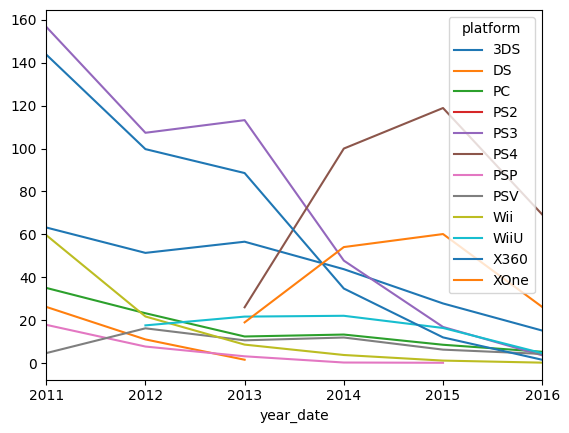

In [25]:
#grafico de lineas de los ultimos 5 años
games_5.pivot_table(index="year_date", columns="platform", values="total_sales", aggfunc="sum").plot(kind="line")

<Axes: xlabel='year_date'>

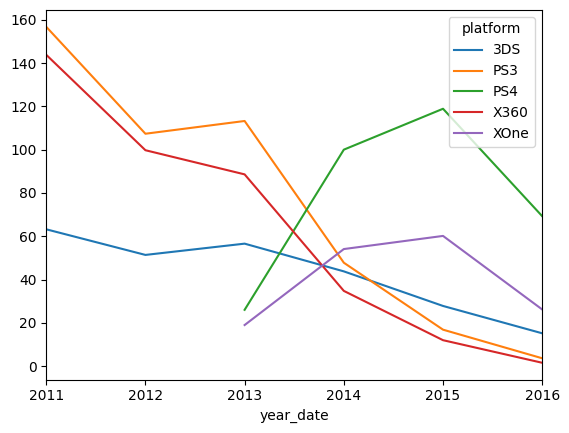

In [26]:
top_last_5 = list(games_5.groupby("platform")["total_sales"].sum().sort_values().tail(5).index)
#graficaremos el top 5 de las plataformas con mayor ventas

(
    games_5[games_5["platform"].isin(top_last_5)]
    .pivot_table(index="year_date",
                 columns="platform",
                 values="total_sales",
                 aggfunc="sum")
    .plot(kind="line")
)

Las plataformas líderes en la actualidad son 3DS, PS3, PS4, X360 y XOne. Sin embargo, es razonable descartar X360 y PS3 ya que las compañias cuentan con plataformas más recientes (XOne y PS4) las cuales según la tendencia terminarán por desplazarlas. Además, podremos incluir PC como rentable ya que se sigue mantenido con ventas por 26 años consecutivos, WiiU podríamos considerarla igual ya que su predecesora Wii se mantuvo en ventas por 11 años consecutivos y WiiU fue lanzado en 2012 por lo que esperariamos que aun tenga ventas unos años más. De manera que consideraremos como rentables las siguientes:
-3DS
-PS4
-XOne
-PC
-WiiU


In [27]:
#filtrado de plataformas de interés
plataformas = ["3DS", "PS4", "XOne", "PC", "WiiU"]

interes = games_act[games_act["platform"].isin(plataformas)]

<Axes: xlabel='platform'>

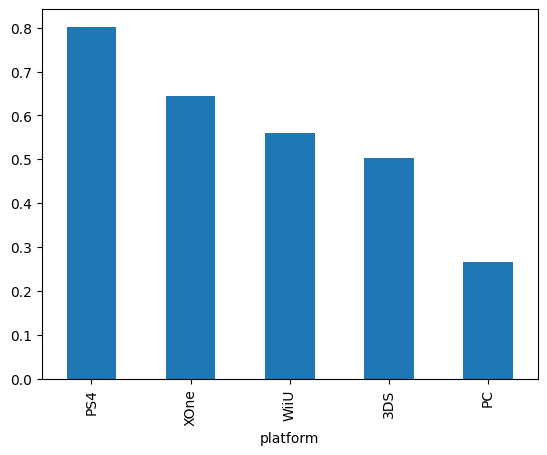

In [28]:
(
    interes.groupby("platform")["total_sales"].mean().sort_values(ascending=False).plot(kind="bar")
)

<Axes: xlabel='year_date'>

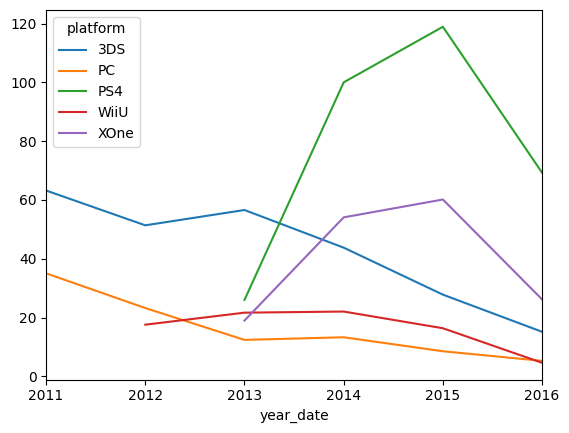

In [70]:
#grafica de lineas de la tendencia en ventas de las plataformas de interes
(
    games_5[games_5["platform"].isin(plataformas)]
    .pivot_table(index="year_date",
                 columns="platform",
                 values="total_sales",
                 aggfunc="sum")
    .plot(kind="line")
)

En nuestras plataformas de interés, la mas rentable parece ser la PS4 y el XOne. Sin embargo, considerar las 5 plataformas parecen ser buena opción.

#### Impacto de las reseñas en las ventas. 

Haremos el análisis para la plataforma PS4, crearemos un gráfico de dispersión entre las reseñas y las ventas y calcularemos la correlación.

Text(0.5, 1.0, 'Relación entre la crítica y las ventas')

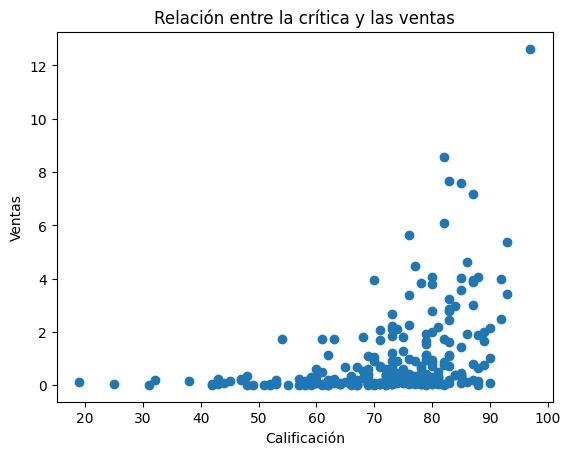

In [29]:
#Creamos un gráfico de dispersión entre las reseñas de los críticos y las ventas
PS4 = games_act.query("platform == 'PS4'")
plt.scatter(PS4["critic_score"], PS4["total_sales"])
plt.xlabel("Calificación")
plt.ylabel("Ventas")
plt.title("Relación entre la crítica y las ventas")

In [30]:
#Correlación entre la critica y las ventas
PS4[["total_sales", "critic_score"]].corr()

,total_sales,critic_score
total_sales,1.000000,0.406568
critic_score,0.406568,1.000000


Text(0.5, 1.0, 'Relación entre las reseñas de usuarios y las ventas')

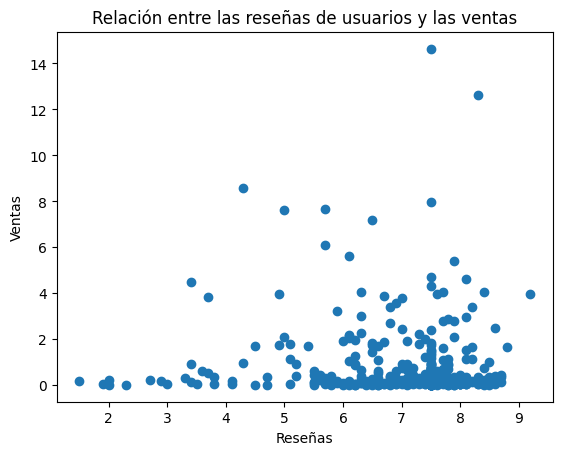

In [31]:
#Creamos un gráfico de dispersión entre las reseñas de los usuarios y las ventas
plt.scatter(PS4["user_score_new"], PS4["total_sales"])
plt.xlabel("Reseñas")
plt.ylabel("Ventas")
plt.title("Relación entre las reseñas de usuarios y las ventas")

In [32]:
#Correlación entre las reseñas y las ventas
PS4[["total_sales", "user_score_new"]].corr()

,total_sales,user_score_new
total_sales,1.000000,-0.062756
user_score_new,-0.062756,1.000000


Parece haber una relación considerable entre las criticas de los profesionales y las ventas totales de un juego, sin embargo no ocurre lo mismo con las reseñas de los usuarios ya que la correlación es muy baja. De modo que podemos deducir que las criticas influyen en las ventas de un juego.

#### Comparación de las ventas de los mismos juegos en distintas plataformas. 

Primero seleccionaremos el juego que se ha publicado en mas plataformas para evaluar en cual ha tenido mayores ventas.

In [33]:
games_act.groupby("name")["platform"].nunique().sort_values(ascending=False)

name
Need for Speed: Most Wanted            10
LEGO Marvel Super Heroes                9
FIFA 14                                 9
Ratatouille                             9
The LEGO Movie Videogame                8
                                       ..
Inazuma Eleven Strikers                 1
Inazuma Eleven Strikers 2012 Xtreme     1
Incredible Crisis                       1
Independence Day                        1
¡Shin Chan Flipa en colores!            1
Name: platform, Length: 11118, dtype: int64

<Axes: xlabel='platform'>

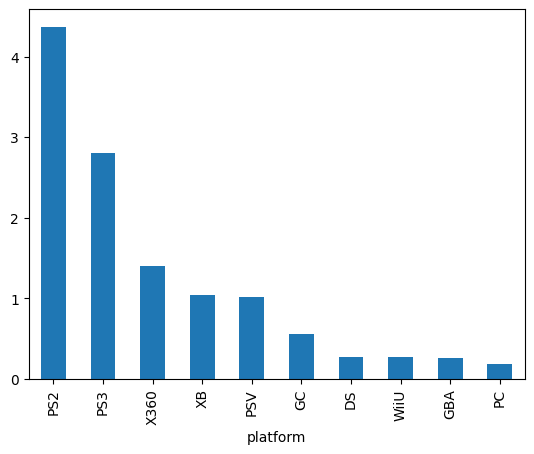

In [34]:
#Need for Speed se ha publicado en 10 plataformas diferentes, así que graficamos las ventas.
nfs = games_act.query("name == 'Need for Speed: Most Wanted'")
(
    nfs.groupby("platform")["total_sales"]
    .mean()
    .sort_values(ascending=False)
    .plot(kind="bar")
)

<Axes: xlabel='platform'>

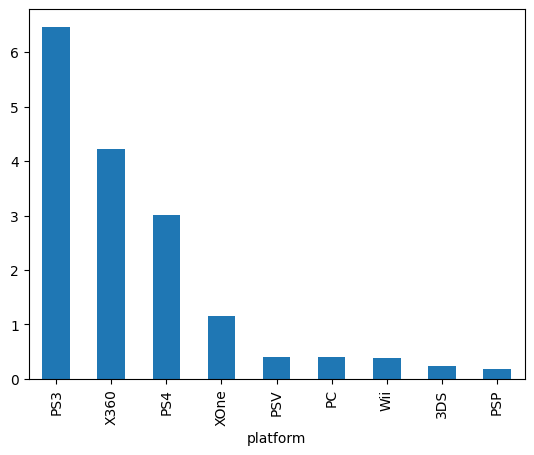

In [35]:
#FIFA 14 ha sido distribuido en 9 plataformas, conpararemos sus ventas.
fifa14 = games_act.query("name == 'FIFA 14'")
(
    fifa14.groupby("platform")["total_sales"]
    .mean()
    .sort_values(ascending=False)
    .plot(kind="bar")
)

Las plataformas de PlayStation siguen demostrando ser lideres en ventas en ambos juegos.

#### Distribución de los juegos por género

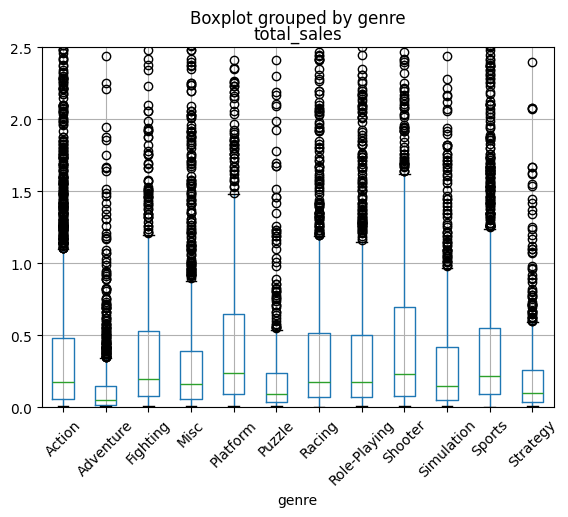

In [36]:
#grafico de cajas para las ventas por genero
games_act.boxplot(
    column="total_sales",
    by="genre",
)
plt.ylim(0, 2.5)
plt.xticks(rotation=45)
plt.show()

Parece ser que los juegos de shooter son los más populares, seguidos de los de plataforma y deportes. Los menos populares son los de estrategia y aventura.

### 4. Crea un perfil de usuario para cada región

#### Las 5 principales plataformas en cada región y sus cuotas de mercado, clasificaciones ESRB y ventas.

Haremos un análisis mediante gráficos de barras por región

In [37]:
#Agrupamos las categorias no tan populares en una nueva categoria "others"
games_act["rating_reduced"] = np.where(
    games_act["rating"].isin(["EC", "K-A", "RP", "AO"]),
    "Other",
    games_act["rating"]
)

games_act["rating_reduced"].value_counts()

/tmp/ipykernel_1317/1491042007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_act["rating_reduced"] = np.where(


rating_reduced
E        3921
T        2903
M        1535
E10+     1392
Other      13
Name: count, dtype: int64

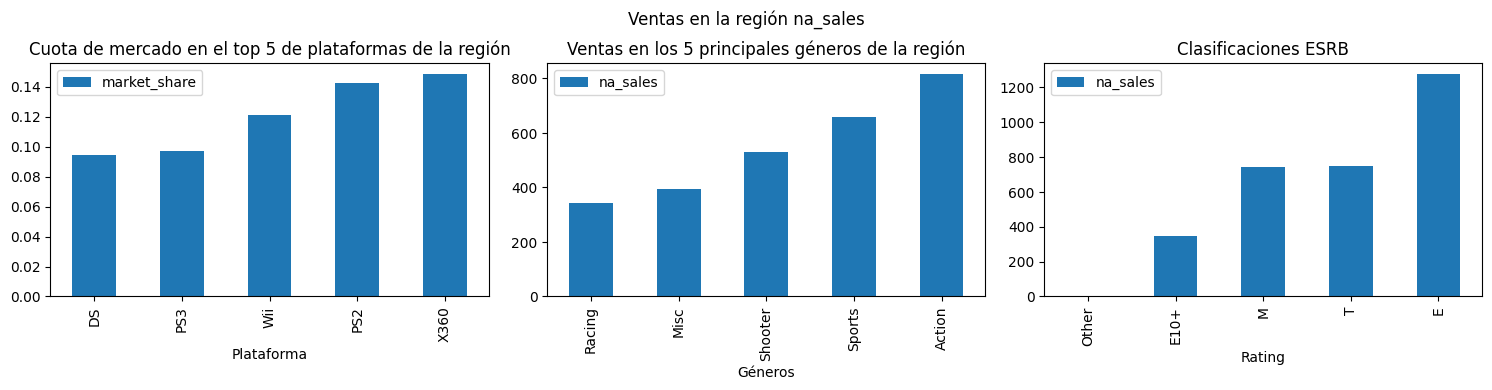

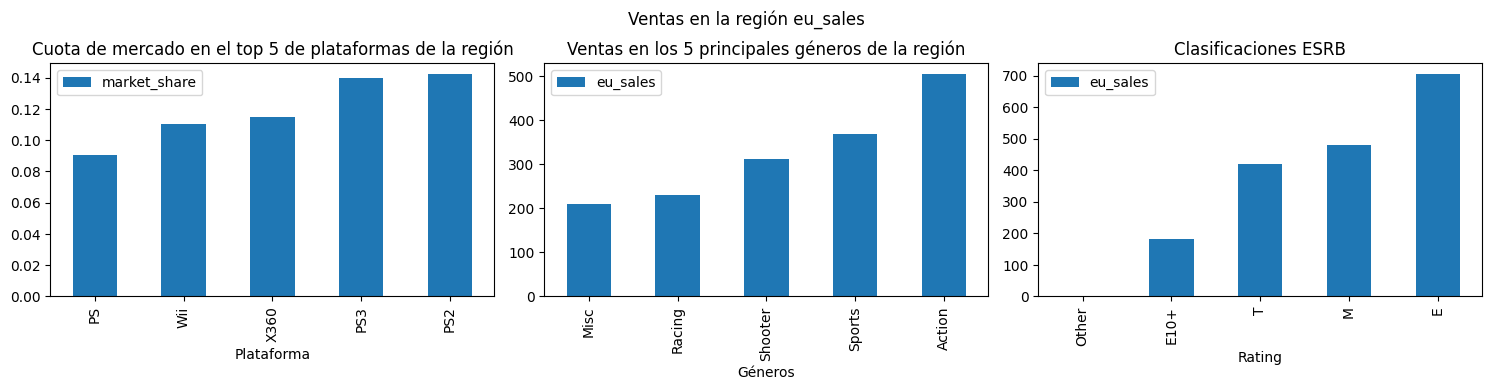

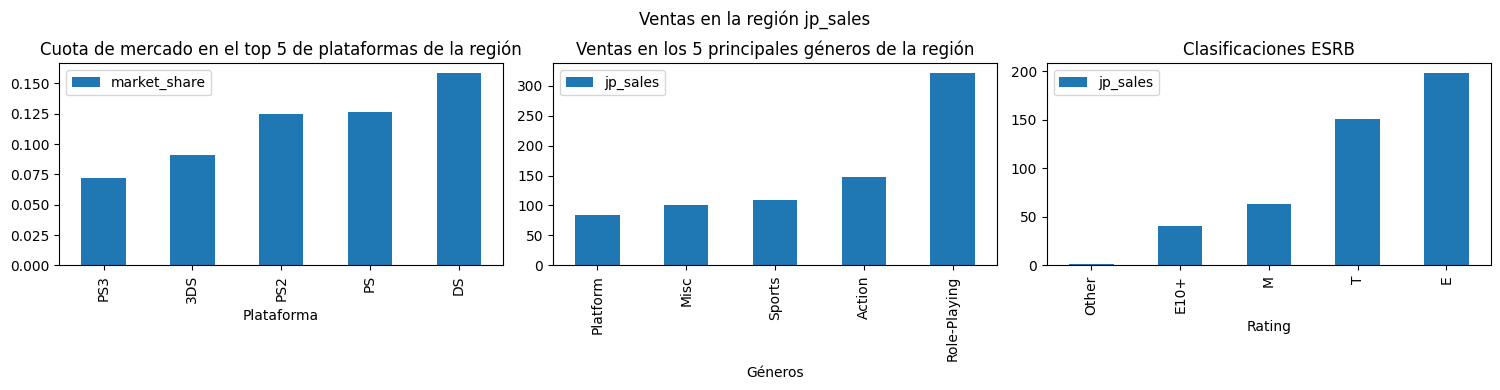

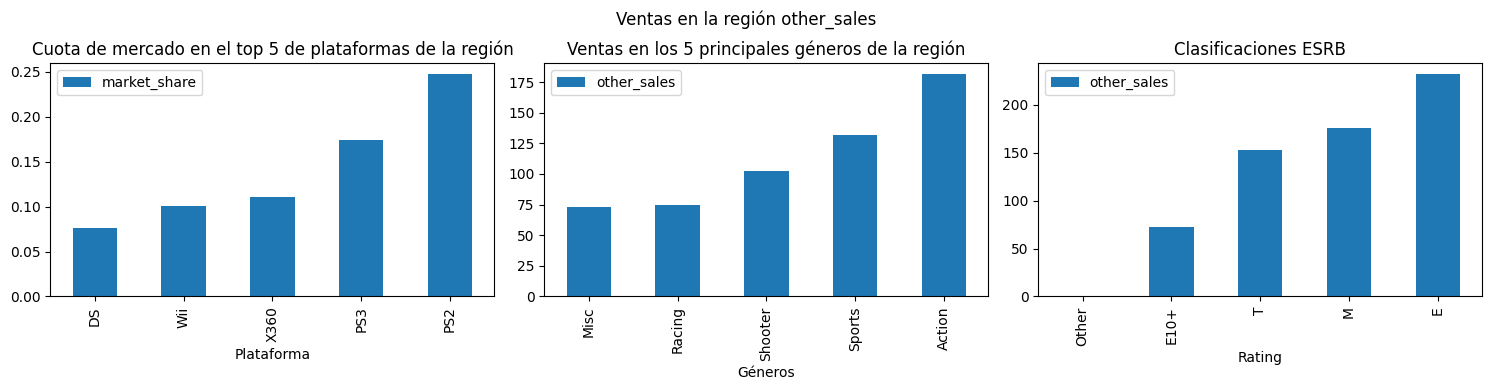

In [38]:
#Creamos un buble for que itere en cada región y grafique las cuotas de mercado de las 5 principales plataformas de cada región y sus géneros principales
for region in ["na_sales", "eu_sales", "jp_sales", "other_sales"]:
    #Colocaremos ambas gráficas de cada región por fila
    fig, axes = plt.subplots(ncols=3, figsize=(15, 4))
    #Agrupamos las ventas por región y plataforma
    sales_by_platform = games_act.groupby("platform")[region].sum()

    #HAcemos un conteo y ordenamos los valores para obtener los 5 principales
    top_region = sales_by_platform.sort_values().tail(5).reset_index()
    #La cuota de mercado se obtiene dividiendo las ventas de la región entre las ventas totales por cada plataforma
    top_region["market_share"] = top_region[region] / sales_by_platform.sum()

    #Repetimos el proceso pero para encontrar el top de generos mas vendidos
    top_genres = games_act.groupby("genre")[region].sum().sort_values().tail(5).reset_index()

    #Hacemos el proceso para las clasificaciones
    top_esrb = games_act.groupby("rating_reduced")[region].sum().sort_values().tail(5).reset_index()

    #Asignamos un titulo por región
    fig.suptitle(f"Ventas en la región {region}", y=0.96)

    #Especificaciones para las gráficas de ventas por plataforma y sus cuotas de mercado
    axes[0].set_title("Cuota de mercado en el top 5 de plataformas de la región")
    top_region.plot(kind="bar", x="platform", y="market_share", xlabel="Plataforma", ax=axes[0])
    #especificaciones para las gráficas de los géneros principales
    axes[1].set_title("Ventas en los 5 principales géneros de la región")
    top_genres.plot(kind="bar", x="genre", y=region, xlabel="Géneros", ax=axes[1])
    #Especificaciones dle tercer grafico para la clasificación
    axes[2].set_title("Clasificaciones ESRB")
    top_esrb.plot(kind="bar", x="rating_reduced", y=region, xlabel="Rating", ax=axes[2])
    
    fig.tight_layout(pad=1)

La cuota de mercado del XBox X360 es ls dominante en Norte America, seguida por Play Station con PS2 y Nintendo Wii, mientras que en la Unión Europea el dominante es Play Station con sus dos plataformas PS3 y PS2 seguido de XBox. Por otro lado en Japón el dominante es una plataforma de Nintendo Portatil DS, seguido de dos plataformas de Play Station. En las ventas de otras regiones nos encontramos con que Play Station domina el mercado segiudo de X360. En todos los casos los líderes siguen siendo los mismos, las versiones anteriores de Play Sation y XBox con presecia de Nintendo. 


En el caso de los géneros, nos encontramos con que los videojuegos de acción dominan en todas las regiones excepto en Japón que es mayor consumidor de juegos de Rol, consecutivamente nos encontramos con juegos de deporte y shooter seguidos de carreras y misc. Japón es el unico con una variación al no contar con videojuegos de disparos como genero de mayores ventas en su top 5, sin embargo en su lugar tiene juegos de plataforma.

En cuestión del Rating, en todas las regiones los juegos de mayores ventas son los que están lanzados para todo publico (E). En el caso de Norte America y Japón los videojuegos que ocupan segundo lugar son para adolescentes (T) seguido de juegos para dultos jovenes (M), mientras que para Europa y el resto de las regiones el segundo lugar es para videojuegos M y el tercero T. En todas las regiones los videojuegos para 10 años en adelante (E10+) ocupa el cuarto lugar.

### 5. Prueba las siguientes hipótesis

#### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

Establecemos la hipótesis de que las calificaciones promedio de los usuarios en plataformas XOne y PC son las mismas como hipótesis nula (H0) y que las calificaciones promedio son diferentes como hipótesis alternativa (H1). Usaremos la prueba t student para determinar si la hipótesis es cierta ya que nos permite comparar dos grupos. El valor de alfa será del 5% ya que es el estandar para el error.

In [64]:
#Creamos dos tablas filtrando unicamente las plataformas Xone y PC

games_xone = games_act[games_act["platform"]== "XOne"]
games_pc = games_act[games_act["platform"]=="PC"]

#importamos la librería necesaria
from scipy.stats import ttest_ind

statistic, p_value = ttest_ind(
    games_xone["user_score_new"],
    games_pc["user_score_new"], 
)

statistic, p_value
#deteminamos alfa
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios de XBox y PC son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: las calificaciones promedio de los usuarios de XBox y PC son iguales.")

Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios de XBox y PC son diferentes.


#### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establecemos que las calificaciones promedio de los usuarios de género acción y de deporte son iguales como Hipótesis nula (HO) y que las calificaciones promedio son diferentes como hipótesis alternativa. Usaremos la misma prueba t student para dicho análisis y alfa como 0.05 ya que suele ser el estándar para estos casos.

In [67]:
#Creamos dos tablas filtrando unicamente los géneros accion y deportes

games_action = games_act[games_act["genre"]== "Action"]
games_sports = games_act[games_act["genre"]=="Sports"]

#importamos la librería necesaria
from scipy.stats import ttest_ind

statistic, p_value = ttest_ind(
    games_action["user_score_new"],
    games_sports["user_score_new"], 
)

statistic, p_value
#deteminamos alfa
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios de juegos de acción y deportes son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: las calificaciones promedio de los usuarios de juegos de acción y deporte son iguales.")

No podemos rechazar la hipótesis nula: las calificaciones promedio de los usuarios de juegos de acción y deporte son iguales.


### 5. Conclusión final

Podemos conlcuir varios puntos para establecer las predicciones del 2017:
1. Es útil evaluar el comportamiento de las ventas de videojuegos a lo largo de los años a partir de que los lanzamientos fueron más activos para conocer las tendencias en las ventas y su duración promedio.
2. Es más  práctico trabajar con datos de años más recientes para conocer cuales plataformas y géneros de videojuegos son líderes en el mercado.
3. Las consolas líderes en el mercado parecen ser PlayStation y XBox en sus versiones más recientes, seguida de Nintendo con WiiU y Nintendo portatil 3DS, sin embargo, se debe considerar PC debido a su consistencia en las ventas.
4. Parece haber una correlación que no se debe descartar entre las críticas de los expertos y las ventas de los videojuegos.
5. Las reseñas de los usuarios no suele afectar la venta de un videojuego.
6. Un mismo juego genera más ventas en consolas PS3 o PS4 y XOne o X360 que en el resto de plataformas que se publique.
7. Los juegos de shooter y deportes son los más comprados en el mercado global.
8. Los videojuegos más comprados son los que cuentan con clasificación E, seguidos de T y M.
9. ELos usuarios prefieren juegos de acción, deportes y disparos. A esepción de los usuarios en Japón que priorizan juegos de rol y descartan juegos de disparos.
10. Las calificaciones promedio de los usuarios varian de acuerdo a la plataforma, pero en promedio son similares en los géneros de acción y deportes.
 